In [119]:
import pandas as pd
import numpy as np

# 📊 Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Pembagian data & pencarian hyperparameter
from sklearn.model_selection import train_test_split, GridSearchCV

# ⚙️ Pra-pemrosesan & Seleksi Fitur
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression

# 🤖 Model Regresi
from sklearn.linear_model import Lasso, Ridge

# 🧩 Pipeline & Utilitas
from sklearn.pipeline import Pipeline
import pickle
import warnings

#Kolom yang dipilih dari dataset
columns = ['Hours studied', 'Previous score', 'Extracurricular Activities', 'Sleep Hours' 
         ,'Sample Question Papers Practiced','Performance Index']
         
#Membaca dataset
df_house = pd.read_csv('dataset/Student_Performance.csv')

df_house.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [120]:
#Melihat jumlah baris dan kolom pada dataset
df_house.shape

(10000, 6)

In [121]:
#Mengubah data kategorikal pada kolom 'Extracurricular Activities' menjadi numerikal
df_house['Extracurricular Activities'] = df_house['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [122]:
# Mengecek jumlah missing value di setiap kolom
df_house.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [123]:
# Menghapus seluruh baris yang punya missing value
df = df_house.dropna(axis=0)

# Memastikan tidak ada missing value lag
df.isnull().sum()  

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [124]:
before = df_house.shape
dupes = df_house[df_house.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_house2 = df_house.drop_duplicates(keep='first')
print("Bentuk data sebelum/ setelah hapus duplikat:", before, "->", df_house2.shape)

Jumlah baris duplikat (terhitung ganda): 253
Bentuk data sebelum/ setelah hapus duplikat: (10000, 6) -> (9873, 6)


In [125]:
# =========================
# Data Checking: Outlier (IQR)
# =========================
numeric_cols = df_house.select_dtypes(include=np.number).columns

print("Pengecekan outlier menggunakan metode IQR:\n")

for col in numeric_cols:
    Q1 = df_house[col].quantile(0.25)
    Q3 = df_house[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df_house[col] < lower_bound) |
                     (df_house[col] > upper_bound)).sum()

    print(f"{col}: {outlier_count} outlier")

Pengecekan outlier menggunakan metode IQR:

Hours Studied: 0 outlier
Previous Scores: 0 outlier
Extracurricular Activities: 0 outlier
Sleep Hours: 0 outlier
Sample Question Papers Practiced: 0 outlier
Performance Index: 0 outlier


In [126]:
# Mengimpor StandardScaler untuk menstandarisasi data (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

# Mengambil fitur 'Gr Liv Area' sebagai input (X), diubah ke bentuk array NumPy 2D
X = df_house[['Hours Studied']].values

# Mengambil kolom '____' sebagai target (y), dalam bentuk array 1D
y = df_house['Performance Index'].values                                               # Silakan diisi bagian ini dengan kode yang tepat

# Membuat dua scaler terpisah: satu untuk fitur (X), satu untuk target (y)
sc_x = StandardScaler()
sc_y = StandardScaler()                                                       # Silakan diisi bagian ini dengan kode yang tepat

# Menstandarisasi X (menghitung mean dan std pada X, lalu mengubah datanya)
X_std = sc_x.fit_transform(X)

# y perlu dijadikan 2D menggunakan np.newaxis sebelum distandarisasi
# Hasil fit_transform dikembalikan ke 1D dengan .flatten()
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [127]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

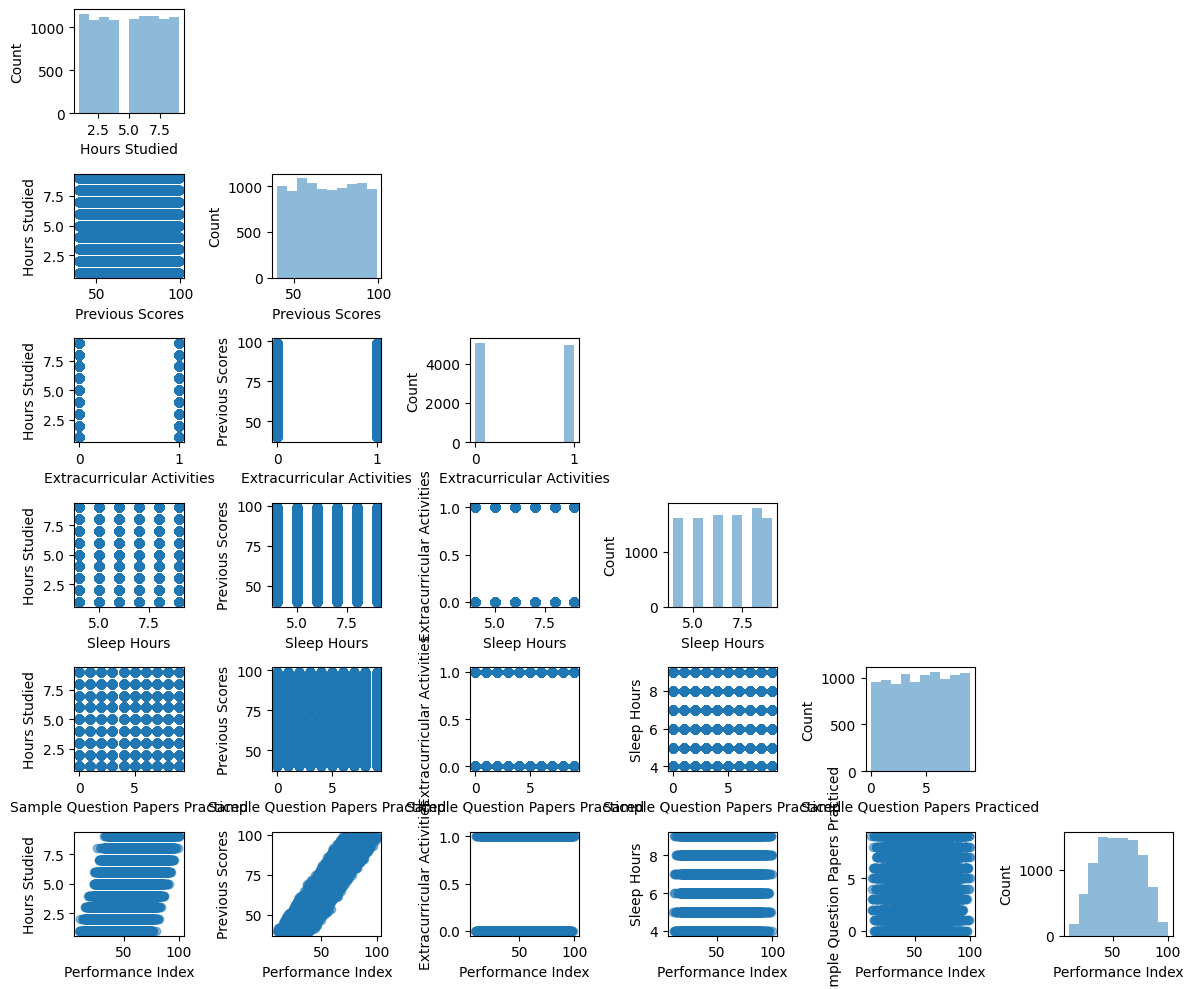

In [128]:
# Membuat scatterplot matrix untuk melihat hubungan antar fitur
scatterplotmatrix(df.values, figsize=(12, 10),               # Silakan diisi bagian ini dengan kode yang tepat
                  names=df.columns,             # Membuat scatterplot matrix untuk melihat hubungan antar fitur
                  alpha=0.5)                    # transparansi titik

plt.tight_layout()
plt.show()                                     # Silakan diisi bagian ini dengan kode yang tepat

In [130]:
# Mengambil fitur 'Hours Studied' sebagai input (X), diubah ke bentuk array NumPy 2D
# Pastikan nama dataframe sesuai, misal 'df' atau 'df_house'
X = df[['Hours Studied']].values

# Mengambil kolom 'Performance Index' sebagai target (y), dalam bentuk array 1D
y = df['Performance Index'].values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)
print(f"Shape Train: {X_train.shape}")
print(f"Shape Test : {X_test.shape}")

Shape Train: (7000, 1)
Shape Test : (3000, 1)


In [131]:
# =========================================================
# 1. DEFINISI PIPELINE (Sesuai Rubrik: Scaler -> Selector -> Model)
# =========================================================

# Pipeline 1: LASSO
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),       # Placeholder, akan divariasikan di GridSearch
    ('selector', SelectKBest()),        # Placeholder, akan divariasikan di GridSearch
    ('regressor', Lasso(random_state=98)) # Model Lasso
])

# Pipeline 2: RIDGE
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest()),
    ('regressor', Ridge(random_state=98)) # Model Ridge
])

# =========================================================
# 2. PARAMETER GRID (Skenario Eksperimen)
# =========================================================
# Kita membuat skenario untuk membandingkan:
# - Scaler: StandardScaler vs MinMaxScaler
# - Selector: SelectKBest vs SelectPercentile
# - Hyperparameter Alpha: 0.01, 0.1, 1, 10
# =========================================================

param_grid = [
    # Skenario A: Menggunakan SelectKBest (Memilih k fitur terbaik)
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectKBest(score_func=f_regression)],
        'selector__k': [3, 4, 5, 'all'],            # Eksperimen jumlah fitur
        'regressor__alpha': [0.01, 0.1, 1, 10]      # Eksperimen alpha
    },
    # Skenario B: Menggunakan SelectPercentile (Memilih % fitur terbaik)
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectPercentile(score_func=f_regression)],
        'selector__percentile': [50, 75],           # Eksperimen persentase
        'regressor__alpha': [0.01, 0.1, 1, 10]
    }
]

# =========================================================
# 3. EKSEKUSI TRAINING (GridSearchCV)
# =========================================================

print("⏳ Sedang melatih model LASSO...")
grid_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train, y_train)
print(f"✅ Selesai! Skor R2 Terbaik Lasso: {grid_lasso.best_score_:.4f}")
print(f"   Parameter Terbaik: {grid_lasso.best_params_}\n")

print("⏳ Sedang melatih model RIDGE...")
grid_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
print(f"✅ Selesai! Skor R2 Terbaik Ridge: {grid_ridge.best_score_:.4f}")
print(f"   Parameter Terbaik: {grid_ridge.best_params_}")                 # Standarisasi fitur input

⏳ Sedang melatih model LASSO...
✅ Selesai! Skor R2 Terbaik Lasso: 0.1427
   Parameter Terbaik: {'regressor__alpha': 0.01, 'scaler': StandardScaler(), 'selector': SelectKBest(score_func=<function f_regression at 0x300111a80>), 'selector__k': 3}

⏳ Sedang melatih model RIDGE...


/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=3 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=3 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=3 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=3 is greater than n_features=1. All the features

✅ Selesai! Skor R2 Terbaik Ridge: 0.1427
   Parameter Terbaik: {'regressor__alpha': 10, 'scaler': StandardScaler(), 'selector': SelectKBest(score_func=<function f_regression at 0x300111a80>), 'selector__k': 3}


oisy or the selection test too strict.
  warnings.warn(
/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/Users/dinar/Desktop/Semester 5/Machine Learning/Projek-UAS-ML_KERAS/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:122: UserWarn

✅ Fitur yang terdeteksi: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

📊 HASIL EVALUASI: LASSO
R2 Score (Test) : 0.1301
MSE             : 316.0051
MAE             : 15.3998
RMSE            : 17.7765
ℹ️ Info: Tidak dapat menampilkan detail fitur.


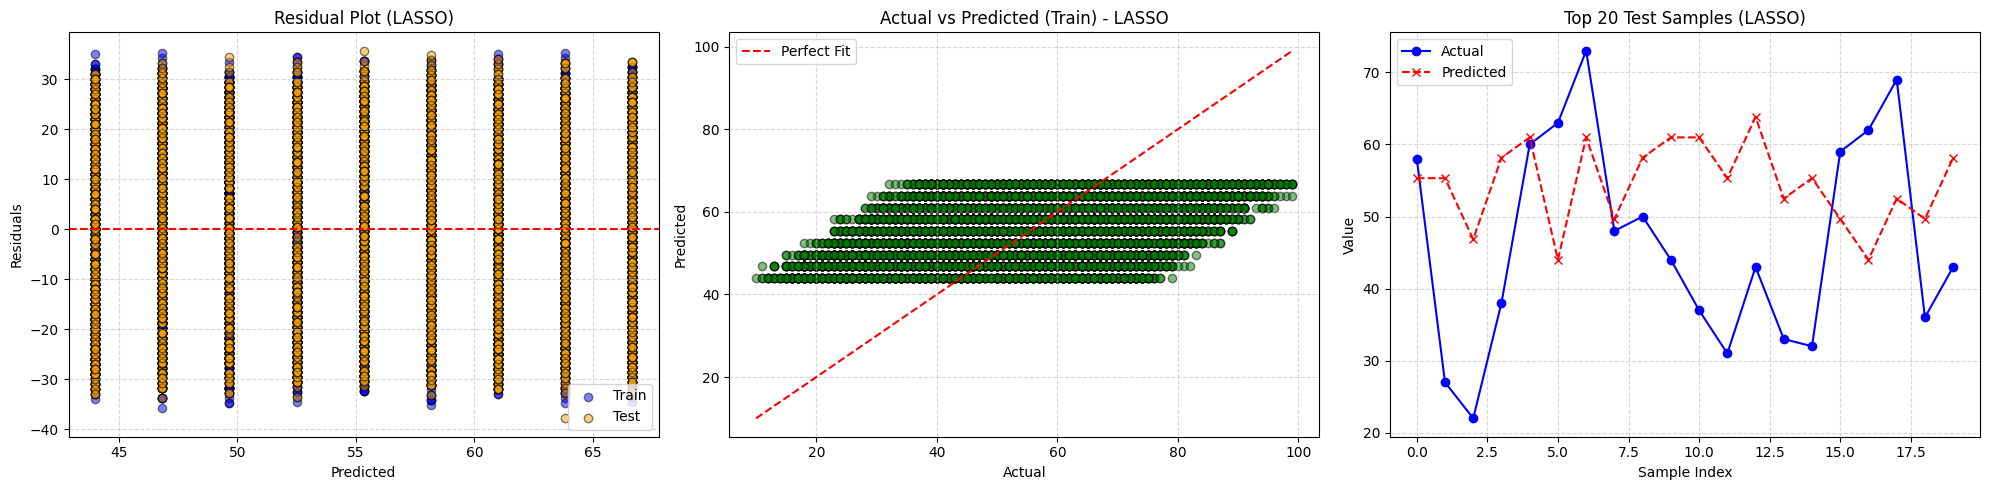


📊 HASIL EVALUASI: RIDGE
R2 Score (Test) : 0.1301
MSE             : 316.0047
MAE             : 15.3998
RMSE            : 17.7765
ℹ️ Info: Tidak dapat menampilkan detail fitur.


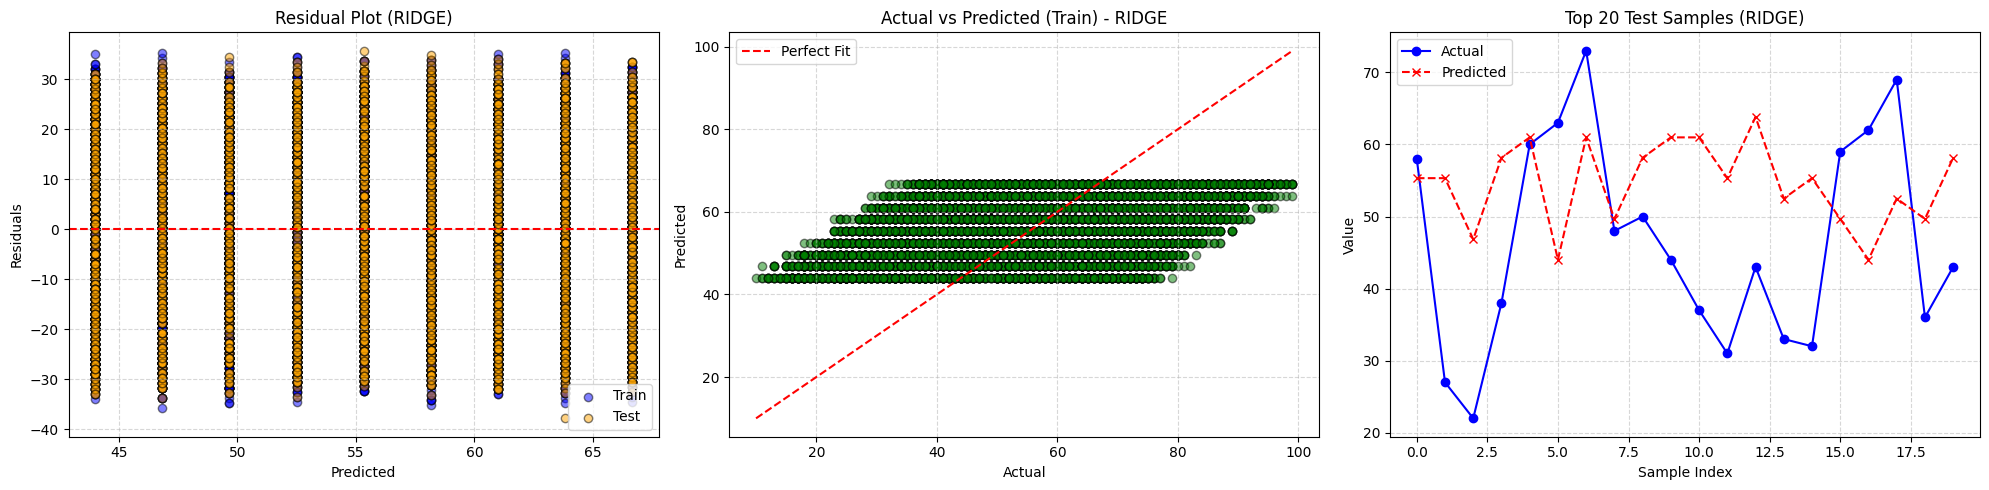

In [132]:
# ==============================================================================
# CELL EVALUASI FINAL (LENGKAP: R2, MSE, MAE, RMSE)
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -----------------------------------------------------------
# 1. PERSIAPAN DATA (Safety Check)
# -----------------------------------------------------------
# Ambil nama fitur dari DataFrame asli 'df' agar aman
target_col = 'Performance Index'
feature_names_safe = df.drop(columns=[target_col]).columns.tolist()

print(f"✅ Fitur yang terdeteksi: {feature_names_safe}")

# -----------------------------------------------------------
# 2. FUNGSI EVALUASI
# -----------------------------------------------------------
def evaluate_and_plot_robust(model_grid, model_name, X_train, y_train, X_test, y_test, feature_names):
    # Konversi y_test & y_train ke numpy array (flatten) agar aman dari error index/iloc
    y_test_np = np.array(y_test).flatten()
    y_train_np = np.array(y_train).flatten()
    
    # Prediksi menggunakan model terbaik dari GridSearch
    best_model = model_grid.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Hitung Semua Metrik (Sesuai Soal)
    r2 = r2_score(y_test_np, y_pred_test)
    mse = mean_squared_error(y_test_np, y_pred_test)
    mae = mean_absolute_error(y_test_np, y_pred_test)
    rmse = np.sqrt(mse)

    print(f"\n{'='*40}")
    print(f"📊 HASIL EVALUASI: {model_name}")
    print(f"{'='*40}")
    print(f"R2 Score (Test) : {r2:.4f}")
    print(f"MSE             : {mse:.4f}")  # <-- Sudah ditambahkan
    print(f"MAE             : {mae:.4f}")  # <-- Sudah ditambahkan
    print(f"RMSE            : {rmse:.4f}")

    # Cek Fitur Terpilih (Feature Selection)
    try:
        selector = best_model.named_steps['selector']
        if hasattr(selector, 'get_support'):
            mask = selector.get_support()
            selected_feats = np.array(feature_names)[mask]
            print(f"✅ Fitur Terpilih: {list(selected_feats)}")
        else:
            print("✅ Semua fitur digunakan.")
    except:
        print("ℹ️ Info: Tidak dapat menampilkan detail fitur.")

    # --- VISUALISASI (MATPLOTLIB ONLY) ---
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Plot 1: Residual Plot
    residual_train = y_train_np - y_pred_train
    residual_test = y_test_np - y_pred_test
    axes[0].scatter(y_pred_train, residual_train, c='blue', alpha=0.5, label='Train', edgecolor='k')
    axes[0].scatter(y_pred_test, residual_test, c='orange', alpha=0.5, label='Test', edgecolor='k')
    axes[0].axhline(0, c='red', linestyle='--')
    axes[0].set_title(f'Residual Plot ({model_name})')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Residuals')
    axes[0].legend()
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # Plot 2: Actual vs Predicted (Train)
    axes[1].scatter(y_train_np, y_pred_train, c='green', alpha=0.5, edgecolor='k')
    # Garis diagonal sempurna
    min_val = min(y_train_np.min(), y_pred_train.min())
    max_val = max(y_train_np.max(), y_pred_train.max())
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')
    axes[1].set_title(f'Actual vs Predicted (Train) - {model_name}')
    axes[1].set_xlabel('Actual')
    axes[1].set_ylabel('Predicted')
    axes[1].legend()
    axes[1].grid(True, linestyle='--', alpha=0.5)

    # Plot 3: Top 20 Samples Comparison (Test)
    limit = min(20, len(y_test_np))
    indices = np.arange(limit)
    axes[2].plot(indices, y_test_np[:limit], marker='o', c='blue', label='Actual')
    axes[2].plot(indices, y_pred_test[:limit], marker='x', linestyle='--', c='red', label='Predicted')
    axes[2].set_title(f'Top {limit} Test Samples ({model_name})')
    axes[2].set_xlabel('Sample Index')
    axes[2].set_ylabel('Value')
    axes[2].legend()
    axes[2].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------
# 3. EKSEKUSI
# -----------------------------------------------------------
evaluate_and_plot_robust(grid_lasso, "LASSO", X_train, y_train, X_test, y_test, feature_names_safe)
evaluate_and_plot_robust(grid_ridge, "RIDGE", X_train, y_train, X_test, y_test, feature_names_safe)

In [133]:
import pickle

# 1. Bandingkan Skor Terbaik (R2 Score dari Cross Validation)
score_lasso = grid_lasso.best_score_
score_ridge = grid_ridge.best_score_

print(f"Best CV Score - Lasso: {score_lasso:.4f}")
print(f"Best CV Score - Ridge: {score_ridge:.4f}")

best_model = None
best_algo_name = ""

# 2. Logika Pemilihan
if score_lasso > score_ridge:
    best_model = grid_lasso.best_estimator_
    best_algo_name = "Lasso"
    print("\n🏆 KESIMPULAN: Model Terbaik adalah LASSO")
else:
    best_model = grid_ridge.best_estimator_
    best_algo_name = "Ridge"
    print("\n🏆 KESIMPULAN: Model Terbaik adalah RIDGE")

# Tampilkan parameter akhir model terbaik
print(f"Parameter Terbaik: {best_model}")

with open(f"model/BestModel_{best_algo_name}_KERAS.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\n✅ Model terbaik: {best_algo_name}")
print(f"✅ File tersimpan sebagai: BestModel_{best_algo_name}_KERAS.pkl")

Best CV Score - Lasso: 0.1427
Best CV Score - Ridge: 0.1427

🏆 KESIMPULAN: Model Terbaik adalah RIDGE
Parameter Terbaik: Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x300111a80>)),
                ('regressor', Ridge(alpha=10, random_state=98))])

✅ Model terbaik: Ridge
✅ File tersimpan sebagai: BestModel_Ridge_KERAS.pkl


In [134]:
print("Lasso Alpha Terbaik:", grid_lasso.best_params_['regressor__alpha'])
print("Ridge Alpha Terbaik:", grid_ridge.best_params_['regressor__alpha'])

Lasso Alpha Terbaik: 0.01
Ridge Alpha Terbaik: 10
